In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

#### Loading and pre-processing

In [3]:
sns.set_style("whitegrid")
sns.set_palette("viridis") 

In [4]:
# Using json
path = '/Users/alyssapradhan/Dropbox/BMI/Fall/HDM/ABM/gens_50'

In [5]:
def read_json(folder_path):
    file_names = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):  
            file_path = os.path.join(folder_path, file_name)
            file_names.append(file_path)
    return file_names

In [6]:
file_names = read_json(path)
file_names

['/Users/alyssapradhan/Dropbox/BMI/Fall/HDM/ABM/gens_50/sim_300_2_1_0.060000000000000005_1.json',
 '/Users/alyssapradhan/Dropbox/BMI/Fall/HDM/ABM/gens_50/sim_300_2_0_0.01_2.json',
 '/Users/alyssapradhan/Dropbox/BMI/Fall/HDM/ABM/gens_50/sim_300_1_0_0.01_3.json',
 '/Users/alyssapradhan/Dropbox/BMI/Fall/HDM/ABM/gens_50/sim_300_1_1_0.060000000000000005_2.json',
 '/Users/alyssapradhan/Dropbox/BMI/Fall/HDM/ABM/gens_50/sim_300_1_1_0.060000000000000005_3.json',
 '/Users/alyssapradhan/Dropbox/BMI/Fall/HDM/ABM/gens_50/sim_300_1_0_0.01_2.json',
 '/Users/alyssapradhan/Dropbox/BMI/Fall/HDM/ABM/gens_50/sim_300_2_0_0.01_3.json',
 '/Users/alyssapradhan/Dropbox/BMI/Fall/HDM/ABM/gens_50/sim_300_1_0_0.060000000000000005_2.json',
 '/Users/alyssapradhan/Dropbox/BMI/Fall/HDM/ABM/gens_50/sim_300_2_1_0.01_1.json',
 '/Users/alyssapradhan/Dropbox/BMI/Fall/HDM/ABM/gens_50/sim_300_2_0_0.060000000000000005_1.json',
 '/Users/alyssapradhan/Dropbox/BMI/Fall/HDM/ABM/gens_50/sim_300_1_0_0.060000000000000005_3.json',
 '

In [7]:

def read_json_lines(file_name):
    data = []
    with open(file_name, 'r') as file:
        for line in file:
            data.append(json.loads(line.strip()))
    return data


In [8]:
sims = []
for file in file_names:
    sims.extend(read_json_lines(file))

In [8]:
sims[1]

{'rec_rate': 0.060000000000000005,
 'multiplier': 1,
 'rec_cost': 1,
 'stay': 2,
 'pop_size': 300,
 'count_As': 0,
 'count_Ss': 300,
 'count_As_recomb': 0,
 'count_Ss_recomb': 0}

In [9]:
abm_data = pd.DataFrame(sims)

In [10]:
abm_data

,rec_rate,multiplier,rec_cost,stay,pop_size,count_As,count_Ss,count_As_recomb,count_Ss_recomb
0,0.06,1,1,2,300,0,300,0,0
1,0.06,1,1,2,300,0,300,0,0
2,0.06,1,1,2,300,2,298,0,0
3,0.06,1,1,2,300,0,300,0,0
4,0.06,1,1,2,300,0,0,0,0
...,...,...,...,...,...,...,...,...,...
115,0.01,1,0,2,300,2,298,1,219
116,0.01,1,0,2,300,0,300,0,92
117,0.01,1,0,2,300,0,300,0,157
118,0.01,1,0,2,300,0,0,0,0


In [11]:
# new columns
abm_data['coop_prop'] = abm_data['count_As'] / (abm_data['count_Ss'] + abm_data['count_As'])
abm_data['multiplier'] = abm_data['multiplier'].astype('category')
abm_data['rec_cheater_prop'] = abm_data['count_Ss_recomb'] / (abm_data['count_As_recomb'] + abm_data['count_Ss_recomb'])

#### Generating figures 2A-2E

Generally for all these visualisations there is not yet enough data for the regression lines / confidence intervals to make sense.


In [13]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 30.1 MB/s eta 0:00:00a 0:00:01


/var/folders/bd/tvfk4lnn1_5cwxbn62tx7msw0000gn/T/ipykernel_49765/1230793668.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for multiplier, sub_group in group.groupby('multiplier'):
/opt/anaconda3/envs/methods2024/lib/python3.12/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


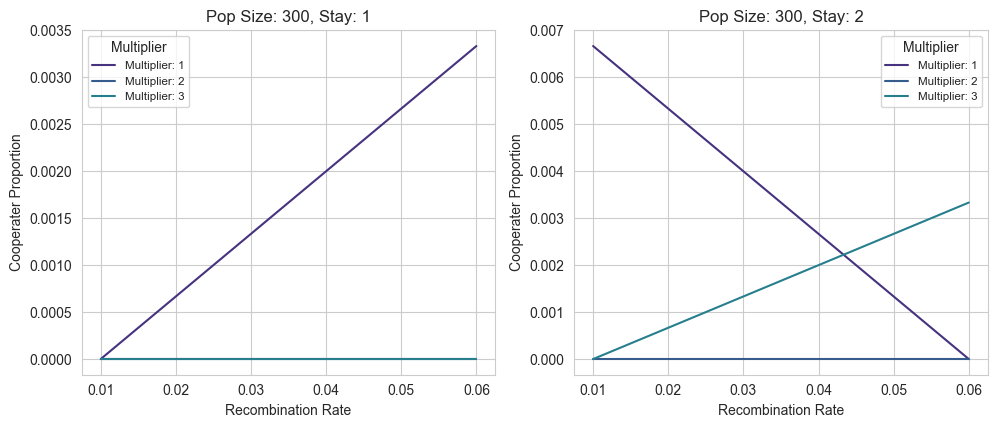

In [21]:
# Using non-linear LOESS smoothing

from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

filtered_data = abm_data[abm_data['rec_cost'] == 0]
grouped = filtered_data.groupby(['pop_size', 'stay'])

# Determine the number of subplots needed
num_plots = len(grouped)
rows = 3
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each group and create the plot
for idx, ((pop_size, stay), group) in enumerate(grouped):
    ax = axes[idx]
    
    # Group further by 'multiplier' and plot a smoothed line for each multiplier
    for multiplier, sub_group in group.groupby('multiplier'):
        # Sort sub_group by 'rec_rate' for consistent LOESS smoothing
        sub_group = sub_group.sort_values(by='rec_rate')
        
        # Apply LOESS smoothing
        smoothed = lowess(
            endog=sub_group['coop_prop'],  # Dependent variable
            exog=sub_group['rec_rate'],   # Independent variable
            frac=0.2                      # 20% of the data used for local smoothing
        )
        
        # Plot the smoothed data
        ax.plot(
            smoothed[:, 0],  # Smoothed rec_rate
            smoothed[:, 1],  # Smoothed coop_prop
            label=f'Multiplier: {multiplier}'
        )
    
    ax.set_title(f'Pop Size: {pop_size}, Stay: {stay}')
    ax.set_xlabel('Recombination Rate')
    ax.set_ylabel('Cooperater Proportion')
    ax.legend(title='Multiplier', fontsize='small')
    ax.grid(True)

# Remove unused subplots if any
for ax in axes[num_plots:]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()


#### Figure 3

/var/folders/bd/tvfk4lnn1_5cwxbn62tx7msw0000gn/T/ipykernel_49765/4119763830.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = abm_data.groupby(['multiplier'])
/opt/anaconda3/envs/methods2024/lib/python3.12/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


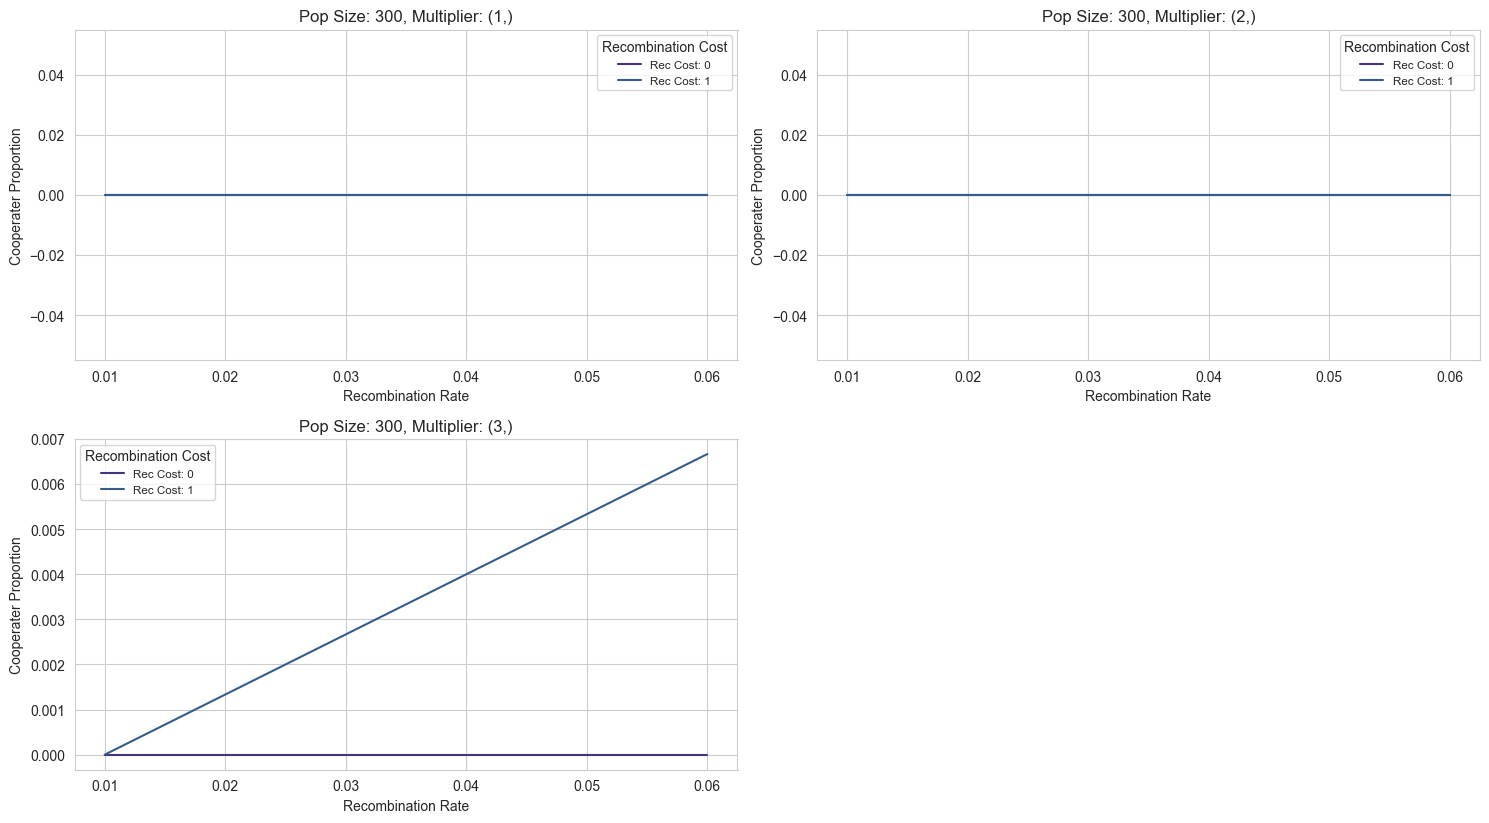

In [22]:
grouped = abm_data.groupby(['multiplier'])

# Determine the number of subplots needed
num_plots = len(grouped)
rows = 3
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each group and create the plot
for idx, ((multiplier), group) in enumerate(grouped):
    ax = axes[idx]
    
    # Group further by 'rec_cost' and plot a line for each rec_cost
    for rec_cost, sub_group in group.groupby('rec_cost'):
        smoothed = lowess(
        endog=sub_group['coop_prop'],  # Dependent variable
        exog=sub_group['rec_rate'],   # Independent variable
        frac=0.2                      # 20% of the data used for local smoothing
            )
        
        # Plot the smoothed data
        ax.plot(
        smoothed[:, 0],  # Smoothed rec_rate
        smoothed[:, 1],  # Smoothed coop_prop
        label=f'Rec Cost: {rec_cost}'
        )

    ax.set_title(f'Pop Size: 300, Multiplier: {multiplier}')
    ax.set_xlabel('Recombination Rate')
    ax.set_ylabel('Cooperater Proportion')
    ax.legend(title='Recombination Cost', fontsize='small')
    ax.grid(True)

# Remove unused subplots if any
for ax in axes[num_plots:]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()

#### Figure 4

/var/folders/bd/tvfk4lnn1_5cwxbn62tx7msw0000gn/T/ipykernel_49765/4214433244.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abm_mult = abm_data.groupby(['multiplier'])
/opt/anaconda3/envs/methods2024/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/methods2024/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


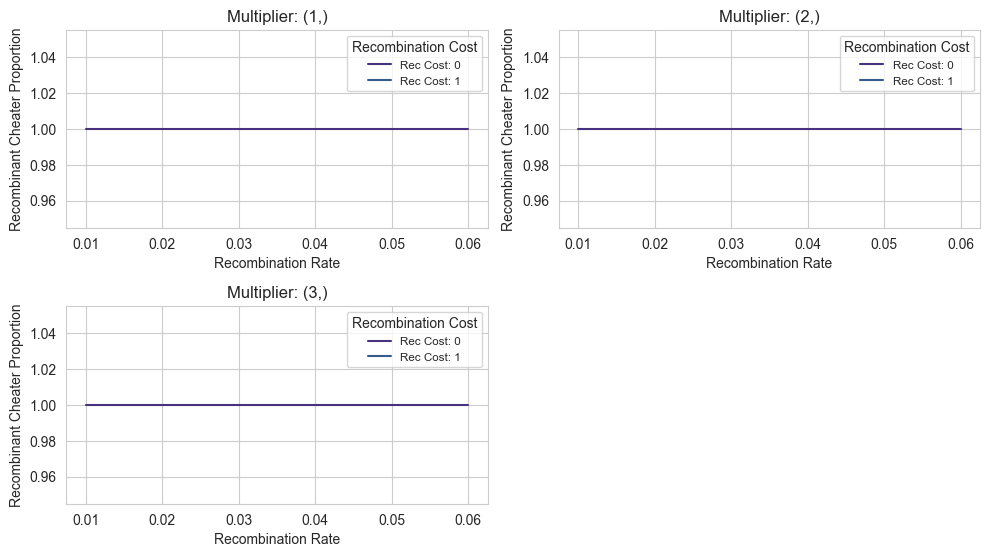

In [23]:
abm_mult = abm_data.groupby(['multiplier'])

# Determine the number of subplots needed
num_plots = len(abm_mult)
rows = 3
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 8))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each group and create the plot
for idx, (multiplier, group) in enumerate(abm_mult):
    ax = axes[idx]
    
    # Plot trend lines for each 'rec_cost'
    for rec_cost, sub_group in group.groupby('rec_cost'):
         smoothed = lowess(
         endog=sub_group['rec_cheater_prop'],  # Dependent variable
         exog=sub_group['rec_rate'],   # Independent variable
         frac=0.2                      # 20% of the data used for local smoothing
            )
        
        # Plot the smoothed data
         ax.plot(
         smoothed[:, 0],  # Smoothed rec_rate
         smoothed[:, 1],  # Smoothed coop_prop
         label=f'Rec Cost: {rec_cost}'
         ) 
         
         
    
    ax.set_title(f'Multiplier: {multiplier}')
    ax.set_xlabel('Recombination Rate')
    ax.set_ylabel('Recombinant Cheater Proportion')
    ax.legend(title='Recombination Cost', fontsize='small')
    ax.grid(True)

# Remove unused subplots if any
for ax in axes[num_plots:]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()

### Old visualisations

#### Figure 2

/var/folders/bd/tvfk4lnn1_5cwxbn62tx7msw0000gn/T/ipykernel_46143/973287783.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for multiplier, sub_group in group.groupby('multiplier'):
/var/folders/bd/tvfk4lnn1_5cwxbn62tx7msw0000gn/T/ipykernel_46143/973287783.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for multiplier, sub_group in group.groupby('multiplier'):


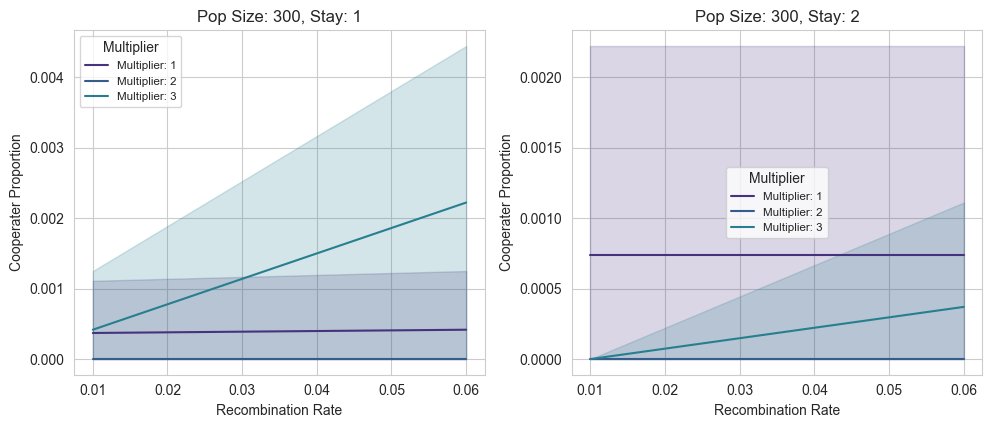

In [12]:
grouped = abm_data.groupby(['pop_size', 'stay'])

# Determine the number of subplots needed
num_plots = len(grouped)
rows = 3
cols = 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each group and create the plot
for idx, ((pop_size, stay), group) in enumerate(grouped):
    ax = axes[idx]
    
    # Group further by 'multiplier' and plot a line for each multiplier
    for multiplier, sub_group in group.groupby('multiplier'):
        sns.lineplot(
            data=sub_group, 
            x='rec_rate', 
            y='coop_prop', 
            #errorbar="ci",
            ax=ax,  # Specify the subplot axis
            label=f'Multiplier: {multiplier}'
        )
    
    
    ax.set_title(f'Pop Size: {pop_size}, Stay: {stay}')
    ax.set_xlabel('Recombination Rate')
    ax.set_ylabel('Cooperater Proportion')
    ax.legend(title='Multiplier', fontsize='small')
    ax.grid(True)

# Remove unused subplots if any
for ax in axes[num_plots:]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()


#### Generating Figure 3A-3E

/var/folders/bd/tvfk4lnn1_5cwxbn62tx7msw0000gn/T/ipykernel_46143/180026492.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = abm_data.groupby(['multiplier'])


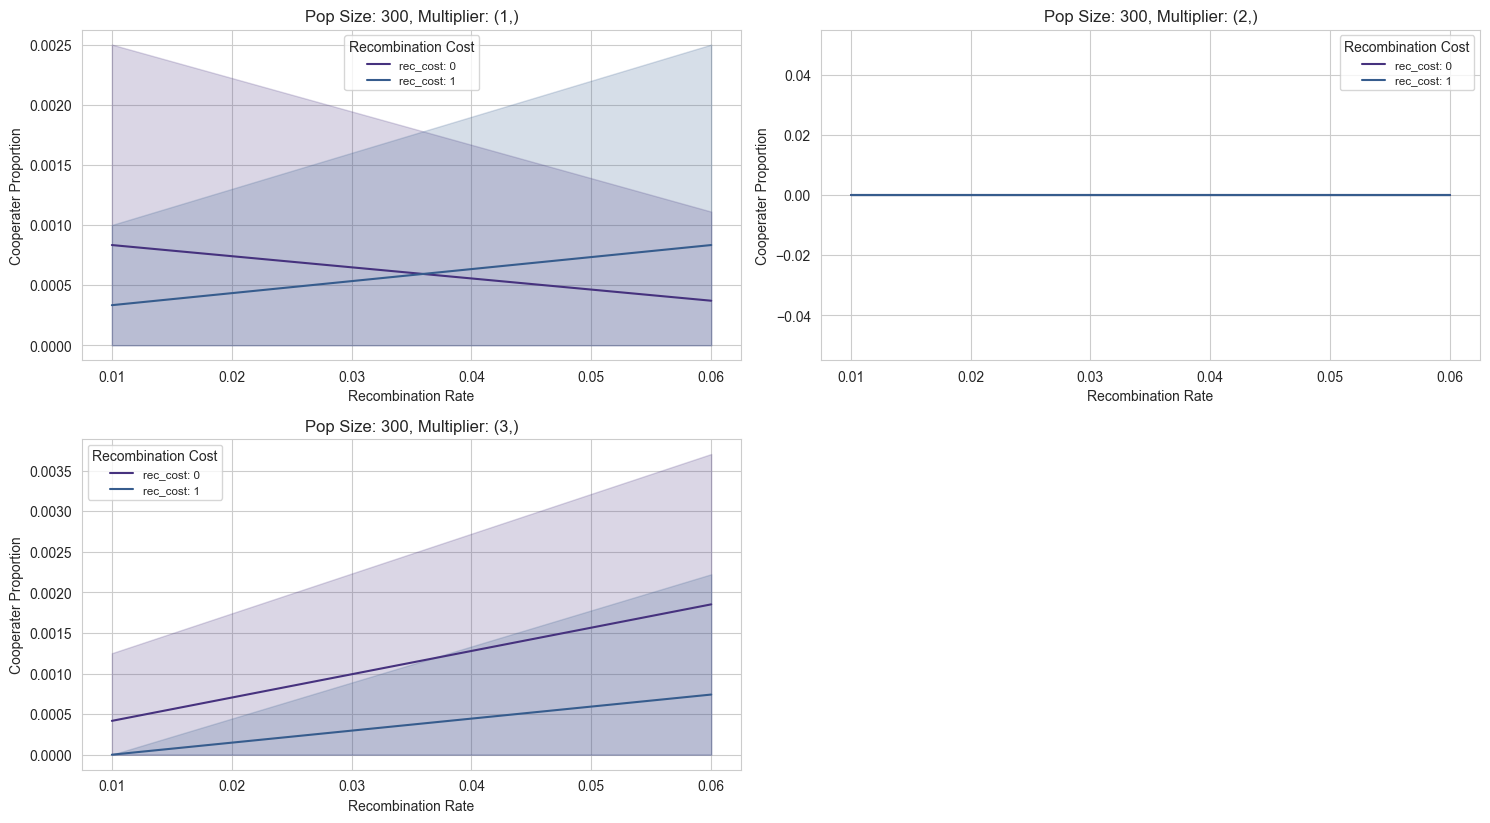

In [20]:
# abm_5k = abm_data[abm_data['pop-size'] == 5000]
grouped = abm_data.groupby(['multiplier'])

# Determine the number of subplots needed
num_plots = len(grouped)
rows = 3
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each group and create the plot
for idx, ((multiplier), group) in enumerate(grouped):
    ax = axes[idx]
    
    # Group further by 'rec_cost' and plot a line for each rec_cost
    for rec_cost, sub_group in group.groupby('rec_cost'):
        sns.lineplot(
            x='rec_rate', 
            y='coop_prop', 
            data=sub_group, 
            ax=ax, 
            label=f'rec_cost: {rec_cost}',
            errorbar="ci" 
        )

    ax.set_title(f'Pop Size: 300, Multiplier: {multiplier}')
    ax.set_xlabel('Recombination Rate')
    ax.set_ylabel('Cooperater Proportion')
    ax.legend(title='Recombination Cost', fontsize='small')
    ax.grid(True)

# Remove unused subplots if any
for ax in axes[num_plots:]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()

#### Generating figure 4A-4E

I realise they're all the same, it looks like that's the underlying data

/var/folders/bd/tvfk4lnn1_5cwxbn62tx7msw0000gn/T/ipykernel_46143/1380775073.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abm_mult = abm_data.groupby(['multiplier'])


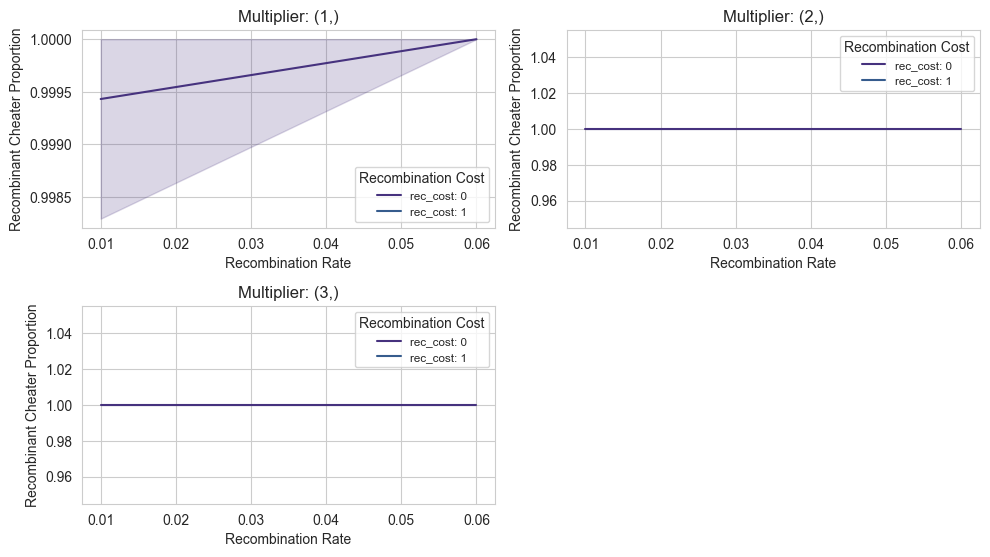

In [24]:
abm_mult = abm_data.groupby(['multiplier'])

# Determine the number of subplots needed
num_plots = len(abm_mult)
rows = 3
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 8))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each group and create the plot
for idx, (multiplier, group) in enumerate(abm_mult):
    ax = axes[idx]
    
    # Plot trend lines for each 'rec_cost'
    for rec_cost, sub_group in group.groupby('rec_cost'):
         sns.lineplot(
            x='rec_rate', 
            y='rec_cheater_prop', 
            data=sub_group, 
            ax=ax, 
            label=f'rec_cost: {rec_cost}',
            errorbar="ci" 
        )
         
         
    
    ax.set_title(f'Multiplier: {multiplier}')
    ax.set_xlabel('Recombination Rate')
    ax.set_ylabel('Recombinant Cheater Proportion')
    ax.legend(title='Recombination Cost', fontsize='small')
    ax.grid(True)

# Remove unused subplots if any
for ax in axes[num_plots:]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()

In [19]:
abm_mult.describe()

rec_rate                                                 rec_cost  \
              count   mean       std   min   25%    50%   75%   max    count   
multiplier                                                                     
1              40.0  0.035  0.025318  0.01  0.01  0.035  0.06  0.06     40.0   
2              40.0  0.035  0.025318  0.01  0.01  0.035  0.06  0.06     40.0   
3              40.0  0.035  0.025318  0.01  0.01  0.035  0.06  0.06     40.0   

                 ... coop_prop           rec_cheater_prop                      \
           mean  ...       75%       max            count      mean       std   
multiplier       ...                                                            
1           0.5  ...       0.0  0.006667             17.0  0.999733  0.001102   
2           0.5  ...       0.0  0.000000             16.0  1.000000  0.000000   
3           0.5  ...       0.0  0.006667             11.0  1.000000  0.000000   

                                          
                 min  25%  50%  75%  max  
multiplier                                
1           0.995455  1.0  1.0  1.0  1.0  
2           1.000000  1.0  1.0  1.0  1.0  
3           1.000000  1.0  1.0  1.0  1.0  

[3 rows x 80 columns]